# Matplotlib Problem Set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Below is the temperature in degrees Celsius for this day (July 10) in Boston from 1961 to 2010. Plot the temperature on the Y-Axis

In [2]:
temp_boston = [17.8, 22.8, 17.5, 16.4, 23.35, 25.3, 27.25, 24.45, 22.5, 23.6, 26.7, 22.75, 21.95, 26.4,
23.05, 22.5, 21.1, 26.1, 23.9, 20.25, 27.8, 23.9, 21.7, 19.7, 25.0, 21.4, 21.1, 27.8, 22.25, 27.25, 
23.35, 25.0, 30.0, 25.8, 23.6, 22.5,19.15, 22.8, 23.6, 25.0, 20.8, 21.4, 18.6, 23.05, 25.0, 25.0,
18.35, 25.3, 18.6]

Text(0.5, 1.0, 'Temperature in Boston from 1961 - 2010')

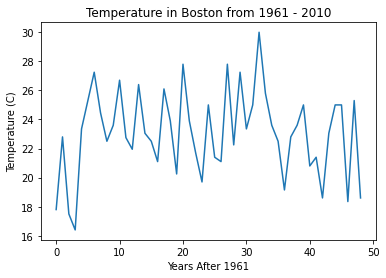

In [24]:
## YOUR CODE HERE
x=np.arange(0,49)
plt.plot(x, temp_boston)
plt.ylabel("Temperature (C)")
plt.xlabel("Years After 1961")
plt.title("Temperature in Boston from 1961 - 2010")
#plt.show()

#### Below is the temperature in degrees Celsius for this day (July 10) in New York from 1961 to 2010. Plot the temperatures of New York and Boston on the same graph in different colors

In [25]:
temp_new_york =[23.35, 25.25, 20.25, 22.25, 25.85, 25.85, 25.55, 24.2, 22.5, 23.9, 28.3, 22.8, 26.7,
29.7, 23.6, 22.8, 23.05, 26.7, 20.3, 23.65, 28.05, 25.0, 21.4, 21.35, 26.1, 25.25, 28.35, 25.85, 27.5,
26.4, 21.7, 27.2, 32.25, 28.3, 22.5, 23.05, 22.8, 25.0, 24.7, 27.5, 25.85, 24.45, 20.0, 24.15, 26.95,
22.5, 25.85, 27.25, 19.4]

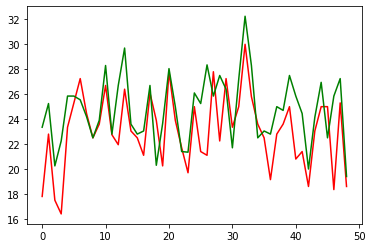

In [34]:
## YOUR CODE HERE
plt.plot(x, temp_boston, 'r-', x, temp_new_york, "g-")
plt.show()

#### Plot the temperatures of New York and Boston on different graphs in the same figure¶

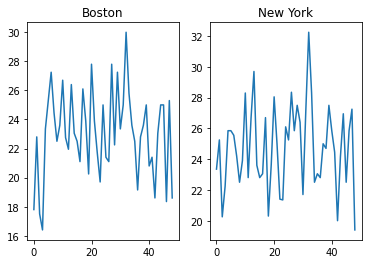

In [38]:
## YOUR CODE HERE
plt.subplot(1, 2, 1)
plt.plot(x, temp_boston)
plt.title("Boston")

plt.subplot(1, 2, 2)
plt.plot(x, temp_new_york)
plt.title("New York")
plt.show() 

### Univariate Analysis:

In [39]:
"""Let's revisit the Dataset_1 again. Read the csv file https://raw.githubusercontent.com/bwsimedlytics/Week1Public/master/BWSI_Dataset1.csv into a dataframe
and print the first 7 rows"""

## YOUR CODE HERE
data = pd.read_csv("https://raw.githubusercontent.com/bwsimedlytics/Week1Public/master/BWSI_Dataset1.csv")
data.head(7)

,SubjectID,Year,Sex,Age,Ethnicity,ParentEducation,MaritalStatus,HouseIncome,Protein,Carb,TotalFat,Chol,VitA,VitC,Weight,Height,BMI,BloodPres,Diabetes,HealthIns,HoursTV
0,1,6,1,49,3,5,1,11,97.13,253.98,114.52,180.57,10292.63,112.19,92.5,178.3,29.10,694,2,1,2
1,2,2,1,37,3,4,5,11,130.02,309.57,178.85,1242.06,4181.03,70.96,99.2,180.0,30.62,1169,2,1,1
2,3,1,1,70,1,1,1,3,67.01,268.23,14.99,37.41,36792.50,78.51,63.6,157.7,25.57,725,1,1,5
3,4,6,2,38,3,5,3,8,82.66,264.69,127.03,596.30,3075.79,36.11,81.6,174.9,26.68,697,2,1,3
4,5,2,2,85,4,1,2,1,39.62,112.24,33.87,124.95,16894.37,69.19,41.5,144.2,19.96,687,2,1,1
5,6,6,2,23,1,1,6,6,97.82,205.70,51.24,527.91,3226.97,32.13,59.8,158.9,23.68,566,2,2,2
6,7,5,2,53,3,3,1,6,34.59,227.03,28.33,33.50,5367.00,15.65,69.9,164.2,25.93,897,2,2,5


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


ValueError: ignored

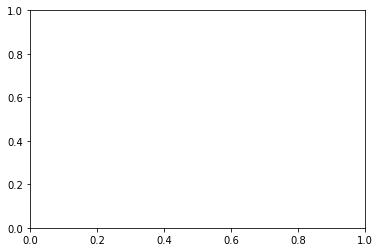

In [122]:
"""Conduct a Univariate Analysis of the participants' Cholesterol. What is noticeable about it? Create a function
that makes the participants' Cholesterol more Normal and create two visualizations, 
one before the Chol data is modified, and one after Chol data is nmodified to be more Normal than before."""

## YOUR CODE HERE
  #data.Chol.describe()
  #data.Chol.hist()
  #data.boxplot(column="Chol")
#very large outliers on the upper end of the data, especially relative to the standard deviation (max: 3092 vs. STDEV: 252 and mean: 287), 75% data less than 380
#histogram indicates majority of data is between 0 and 1000 - very large and few outliers further out
#lots of outliers confirmed in boxplot

def more_Normal(dataframe, column): 
  ## YOUR CODE HERE
  three_q = dataframe.describe().iloc[6, 11]
  one_q = dataframe.describe().iloc[4, 11]

  iqrXopf = (three_q - one_q) * 1.5

  iqr_top = iqrXopf + three_q
  iqr_bottom = one_q - iqrXopf

  #data_no_outliers_boolean = dataframe[str(column)] < iqr_top & dataframe[str(column)] > iqr_bottom
  filtered_data_no_outliers = dataframe[dataframe[str(column)] < iqr_top]
  filtered_data_no_outliers = filtered_data_no_outliers[dataframe[str(column)] > iqr_bottom]
  return filtered_data_no_outliers

data.boxplot(more_Normal(data,"Chol"))
#plt.hist(more_Normal(data,"Chol")) #better representation of data, more Normal than before, now not as strongly skewed

#Hint: which data visualization shows the outliers?

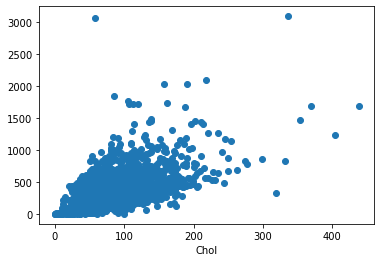

[]

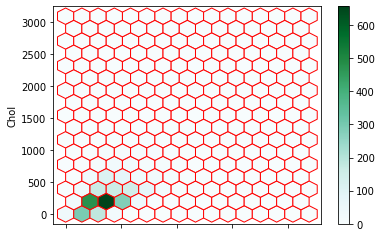

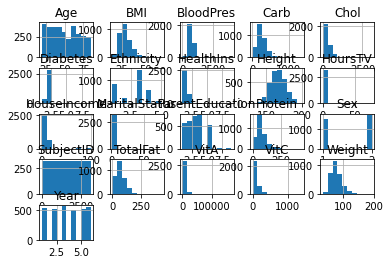

In [74]:
"""Conduct a Bivariate Analysis for Protein and Chol. What is familar about this compared to the tutorial? What is another 
way to deal with overplotting other than the Hex plot? Create two data visualizations, one that shows the overplotting, the other that 
resolves this issue. After you are done, play around with the sns.kdeplot function or try to create a 3D graph to reduce the effects of overplotting."""

## YOUR CODE HERE
p = data.Protein
c = data.Chol
plt.scatter(p, c)
plt.xlabel("Protein")
plt.xlabel("Chol")
plt.show()
data.plot.hexbin(x = "Protein", y = "Chol", gridsize = 15, ec = "r")
plt.plot()


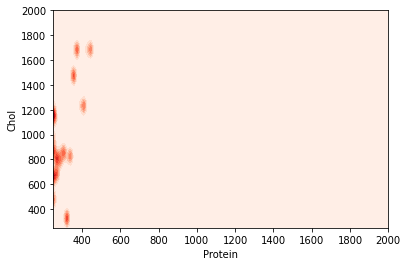

In [84]:
sns.kdeplot(data["Protein"], data["Chol"], cmap="Reds", shade=True, clip=(2000, 250))